In [1]:
LANGUAGE = "es"

In [2]:
from numpy import linspace
from numpy import exp, log, cosh, maximum, tanh

In [3]:
from matplotlib import rcParams 
from matplotlib.pyplot import subplots 
from matplotlib.pyplot import show, close
from matplotlib import cm
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize


rcParams.update({
    "font.family": "STIXGeneral",
    "mathtext.fontset": "stix",
    "axes.labelsize": 14,
    "axes.titlesize": 16,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "legend.fontsize": 12,
    "axes.linewidth": 1.1,
})

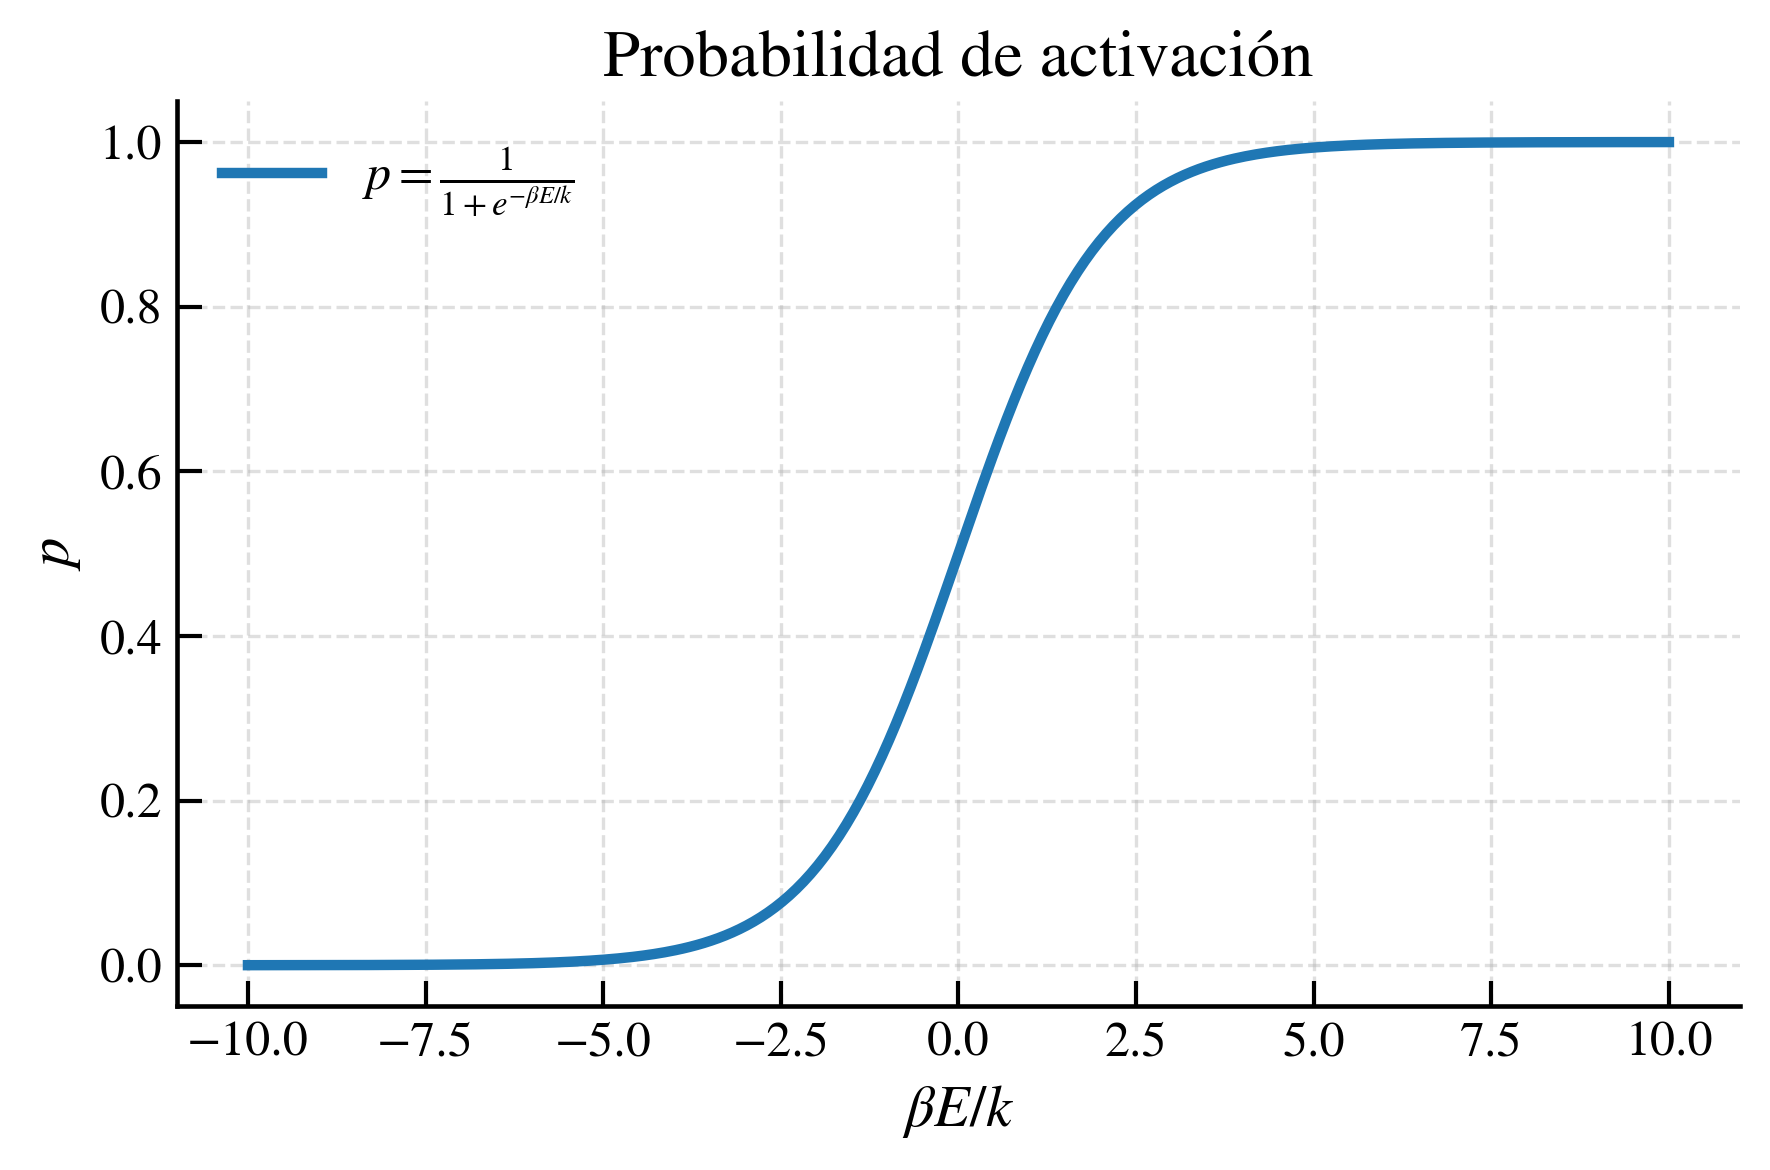

In [4]:
TEXT = {
    "en": {
        "title": "Activation probability",
        "ylabel": r"$p$",
        "xlabel": r"$\beta E/ k$",
        "filename": "probability_plot_en.pdf",
    },
    "es": {
        "title": "Probabilidad de activación",
        "ylabel": r"$p$",
        "xlabel": r"$\beta E/ k$",
        "filename": "probability_plot_es.pdf",
    },
}

text = TEXT[LANGUAGE] 

beta = 1.0
k = 1.0

E = linspace(-10, 10, 400)
p = 1 / (1 + exp(-beta / k * E))

figure, axes = subplots(figsize=(6, 4), dpi=300)

axes.plot(
    E, p,
    linewidth=2.5,
    label=r"$p = \frac{1}{1 + e^{-\beta E / k}}$"
)

axes.set_xlabel(text["xlabel"])
axes.set_ylabel(text["ylabel"])
axes.set_title(text["title"])

axes.grid(True, linestyle="--", alpha=0.4)
axes.tick_params(direction="in", length=6, width=1)

axes.spines["top"].set_visible(False)
axes.spines["right"].set_visible(False)

axes.legend(frameon=False)

figure.tight_layout()
figure.savefig(text["filename"], dpi=300) 

show(figure)
close(figure)

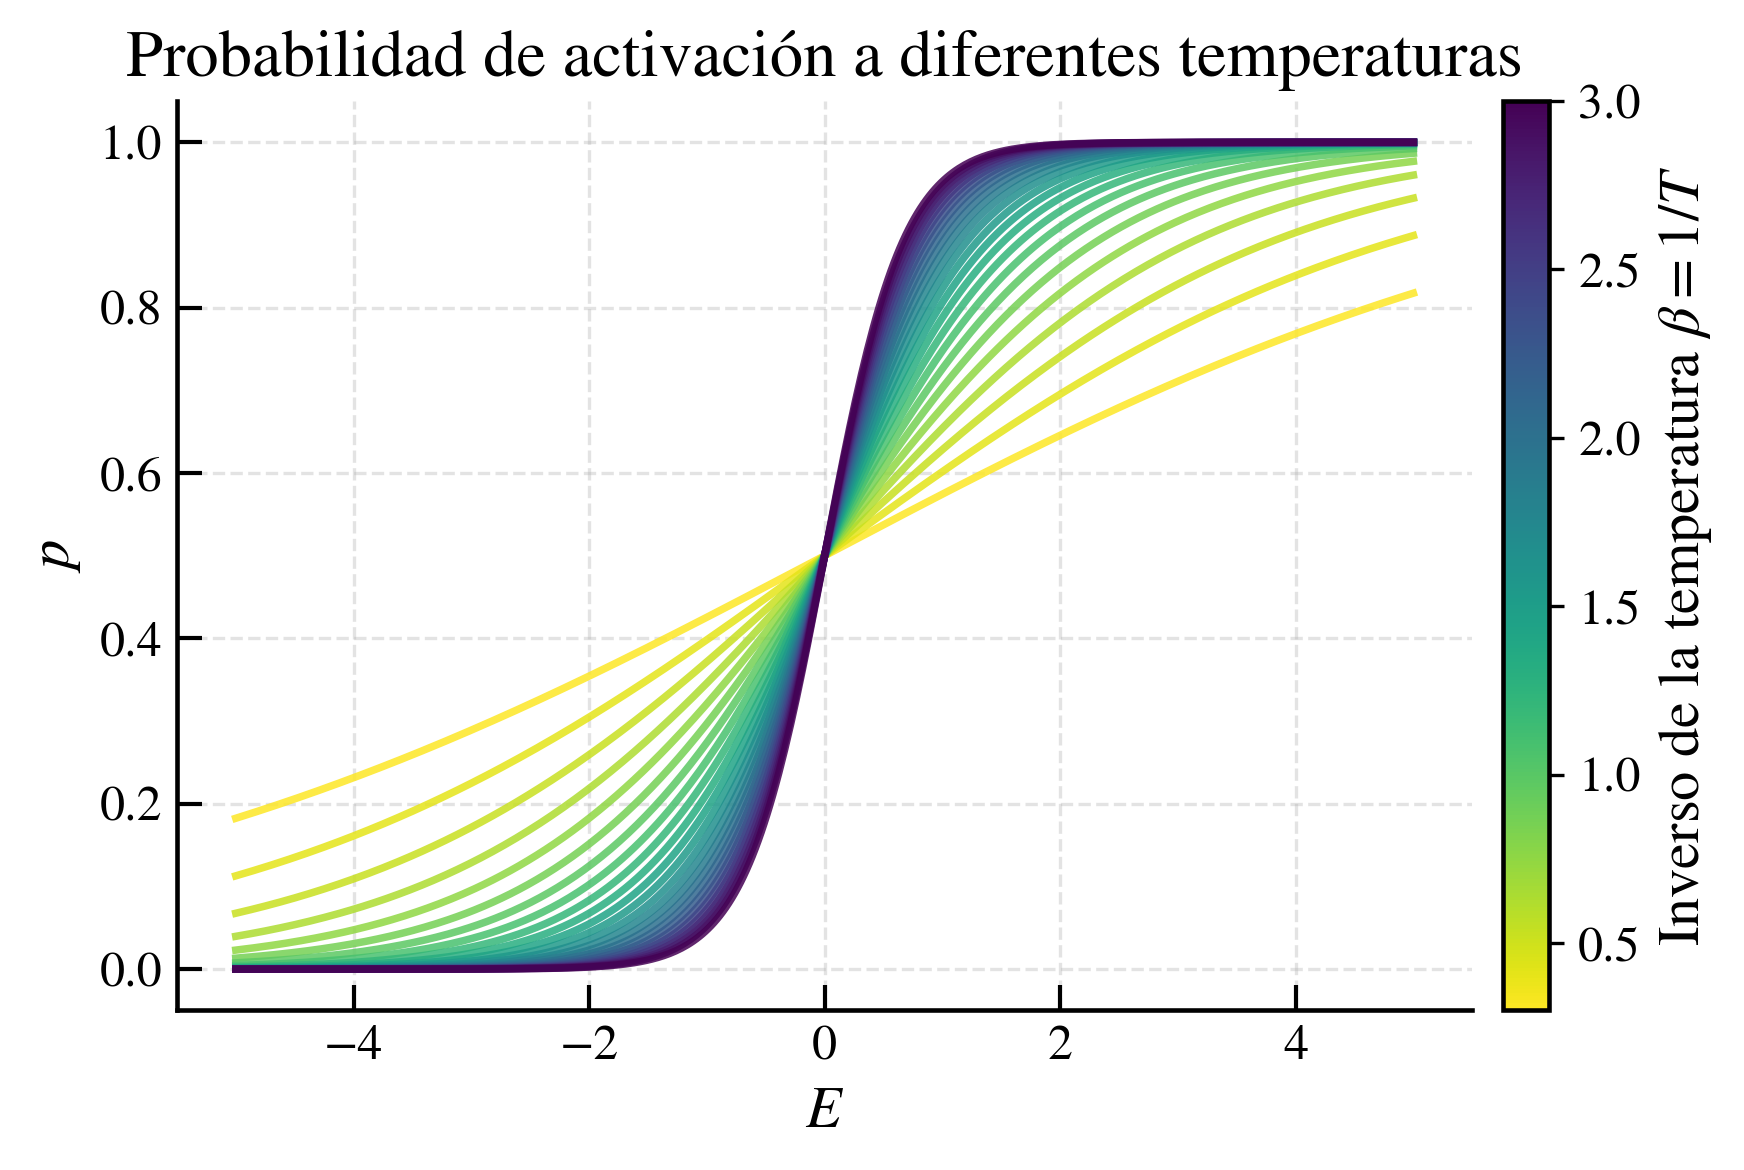

In [5]:
TEXT = {
    "en": {
        "xlabel": r"$E$",
        "ylabel": r"$p$",
        "title": "Activation probability at different temperatures",
        "cbar": r"Inverse temperature $\beta = 1/T$",
        "filename": "sigmoid_temperature_sweep_en.pdf",
    },
    "es": {
        "xlabel": r"$E$",
        "ylabel": r"$p$",
        "title": "Probabilidad de activación a diferentes temperaturas",
        "cbar": r"Inverso de la temperatura $\beta = 1/T$",
        "filename": "sigmoid_temperature_sweep_es.pdf",
    },
}

text = TEXT[LANGUAGE]

k = 1.0
E = linspace(-5, 5, 400)
beta_values = linspace(0.3, 3.0, 25)

cmap = cm.viridis_r
norm = Normalize(vmin=beta_values.min(), vmax=beta_values.max())

figure, axes = subplots(figsize=(6, 4), dpi=300)

for beta in beta_values:
    p = 1 / (1 + exp(-beta / k * E))
    axes.plot(
        E, p,
        color=cmap(norm(beta)),
        linewidth=1.8,
        alpha=0.85
    )

axes.set_xlabel(text["xlabel"])
axes.set_ylabel(text["ylabel"])
axes.set_title(text["title"])

axes.grid(True, linestyle="--", alpha=0.35)
axes.tick_params(direction="in", length=6, width=1)

axes.spines["top"].set_visible(False)
axes.spines["right"].set_visible(False)

scalars = ScalarMappable(norm=norm, cmap=cmap)
scalars.set_array([])
colors = figure.colorbar(scalars, ax=axes, pad=0.02)
colors.set_label(text["cbar"])

figure.tight_layout()
figure.savefig(text["filename"], dpi=300) 

show(figure)
close(figure)


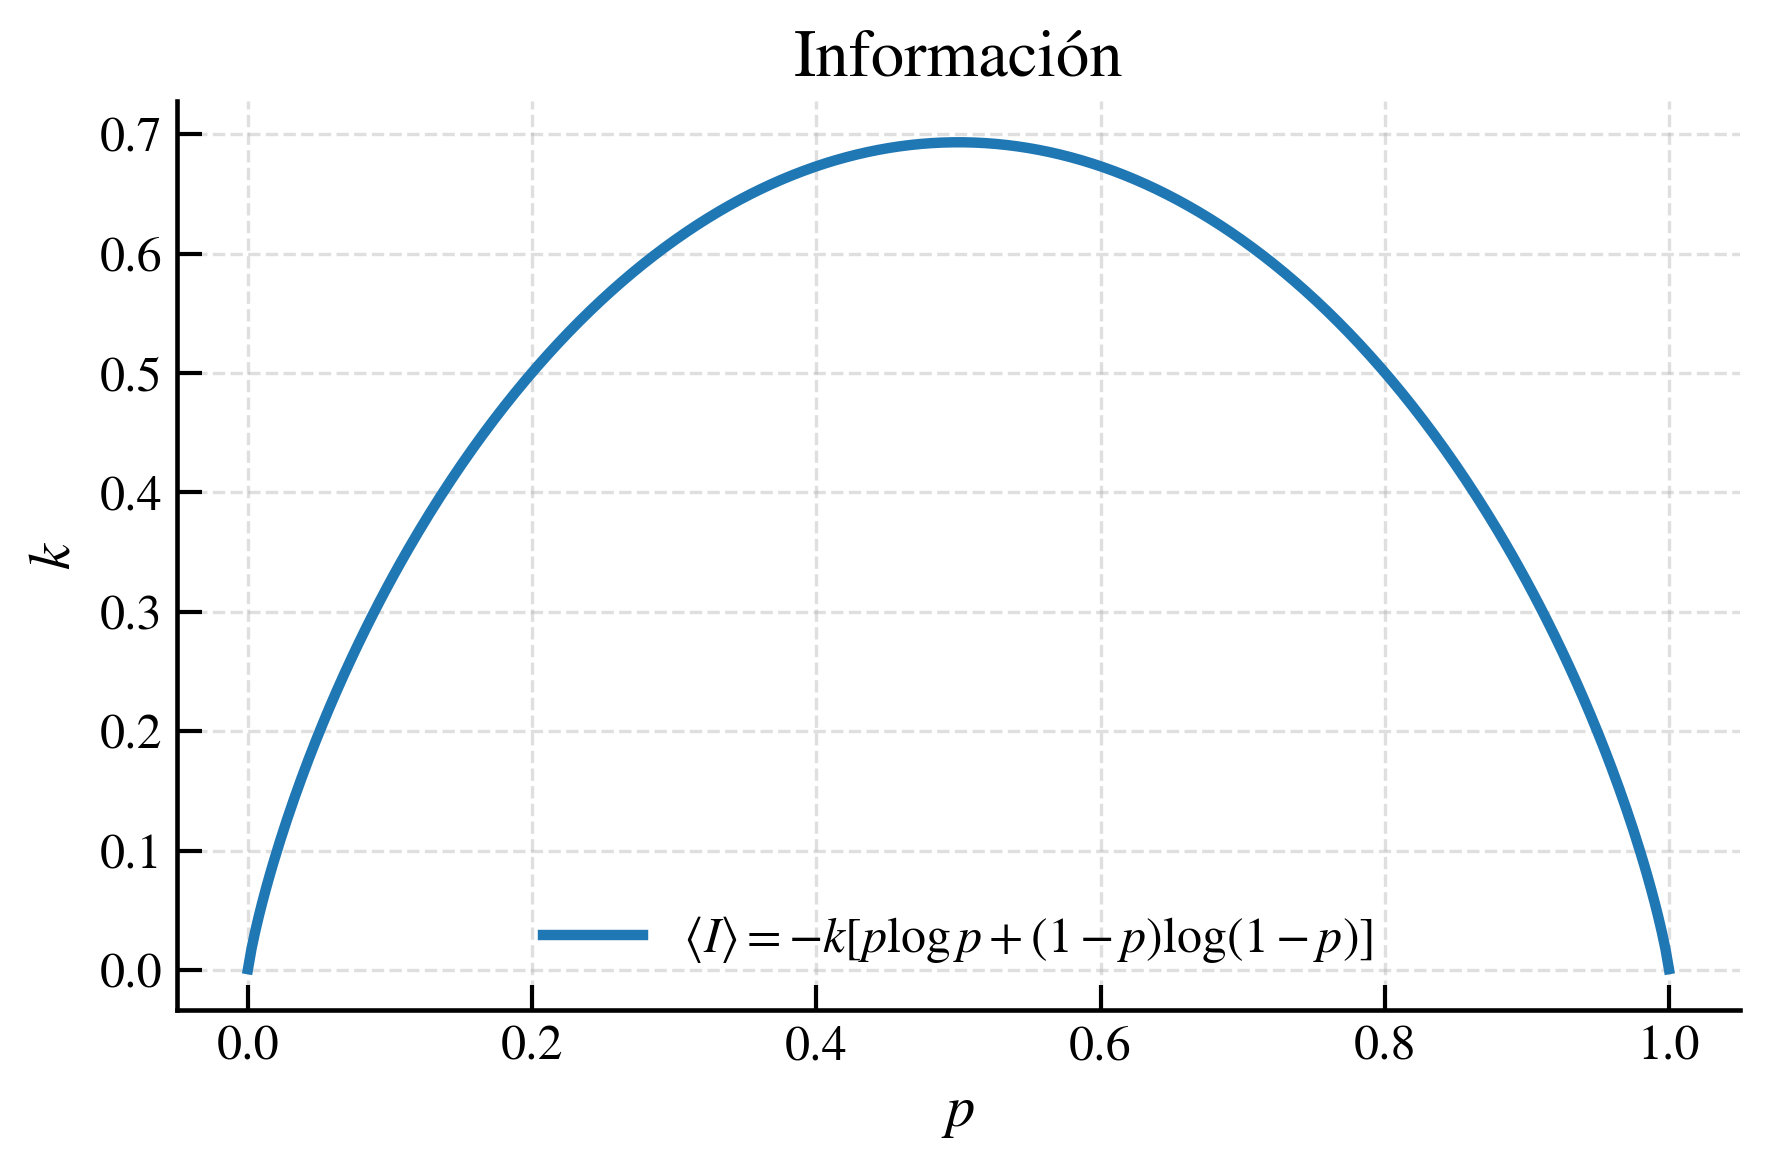

In [6]:
TEXT = {
    "en": {
        "xlabel": r"$p$",
        "ylabel": r"$k$",
        "title": "Information",
        "filename": "entropy_plot_en.pdf",
    },
    "es": {
        "xlabel": r"$p$",
        "ylabel": r"$k$",
        "title": "Información",
        "filename": "entropy_plot_es.pdf",
    },
}
 
text = TEXT[LANGUAGE]

k = 1.0
probability = linspace(1e-4, 1 - 1e-4, 400)

entropy = -k * (
    probability * log(probability)
    + (1 - probability) * log(1 - probability)
)

figure, axes = subplots(figsize=(6, 4), dpi=300)

axes.plot(
    probability,
    entropy,
    linewidth=2.5,
    label=r"$\langle I \rangle = -k[p\log p + (1-p)\log(1-p)]$",
)

axes.set_xlabel(text["xlabel"])
axes.set_ylabel(text["ylabel"])
axes.set_title(text["title"])

axes.grid(True, linestyle="--", alpha=0.4)
axes.tick_params(direction="in", length=6, width=1)

axes.spines["top"].set_visible(False)
axes.spines["right"].set_visible(False)

axes.legend(frameon=False)

figure.tight_layout()
figure.savefig(text["filename"], dpi=300)
 
show(figure)
close(figure)

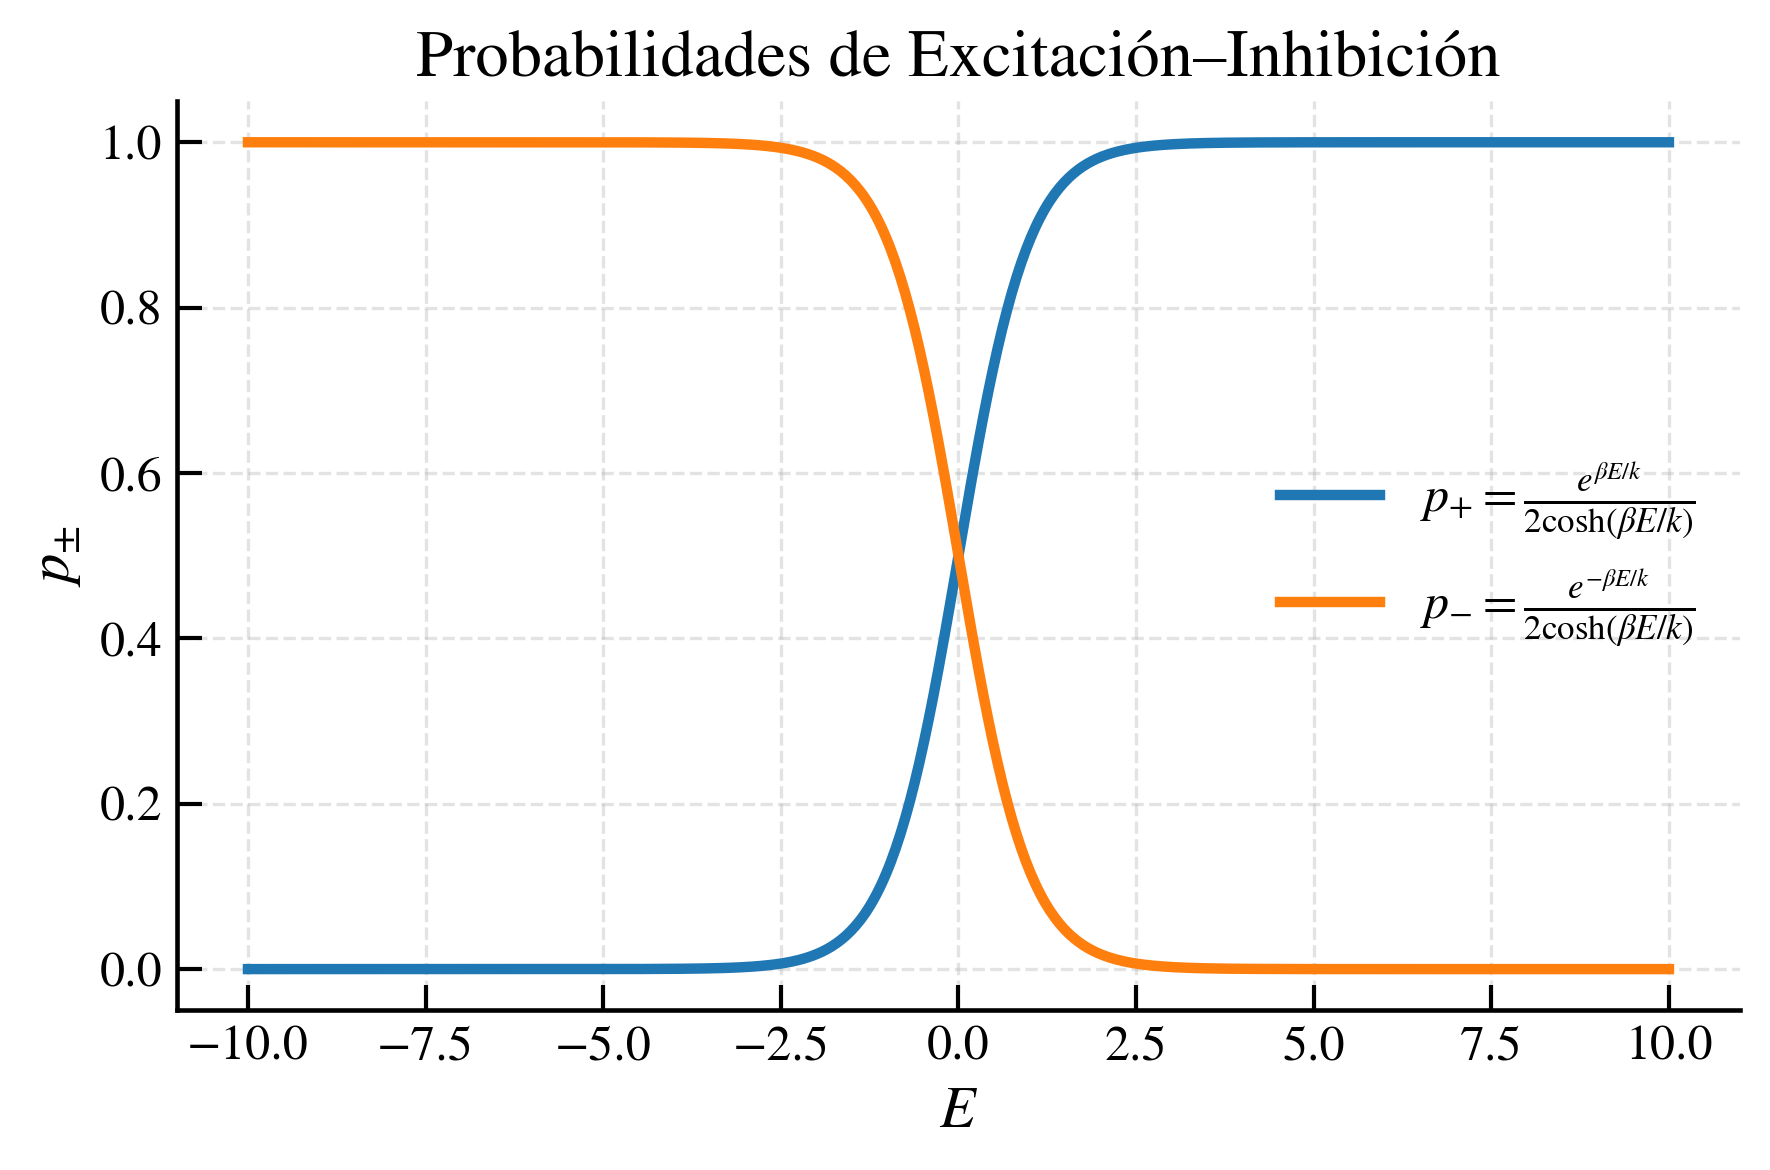

In [7]:
TEXT = {
    "en": {
        "title": "Excitation–Inhibition Probabilities",
        "xlabel": r"$E$",
        "ylabel": r"$p_{\pm}$",
        "filename": "two_level_probabilities_en.pdf",
    },
    "es": {
        "title": "Probabilidades de Excitación–Inhibición",
        "xlabel": r"$E$",
        "ylabel": r"$p_{\pm}$",
        "filename": "two_level_probabilities_es.pdf",
    },
}

text = TEXT[LANGUAGE]
 
beta = 1.0
k = 1.0

energy_values = linspace(-10.0, 10.0, 600)
scaled_energy = beta / k * energy_values

probability_excitation = exp(scaled_energy) / (2.0 * cosh(scaled_energy))
probability_inhibition = exp(-scaled_energy) / (2.0 * cosh(scaled_energy))

figure, axes = subplots(
    figsize=(6.0, 4.0),
    dpi=300
)

axes.plot(
    energy_values,
    probability_excitation,
    linewidth=2.5,
    label=r"$p_{+} = \frac{e^{\beta E/k}}{2\cosh(\beta E/k)}$"
)

axes.plot(
    energy_values,
    probability_inhibition,
    linewidth=2.5,
    linestyle="-",
    label=r"$p_{-} = \frac{e^{-\beta E/k}}{2\cosh(\beta E/k)}$"
)

axes.set_xlabel(text["xlabel"])
axes.set_ylabel(text["ylabel"])
axes.set_title(text["title"])

axes.grid(
    visible=True,
    linestyle="--",
    alpha=0.35
)

axes.tick_params(
    direction="in",
    length=6,
    width=1
)

axes.spines["top"].set_visible(False)
axes.spines["right"].set_visible(False)

axes.legend(frameon=False)

figure.tight_layout()
figure.savefig(
    text["filename"],
    dpi=300
)

show(figure)
close(figure)


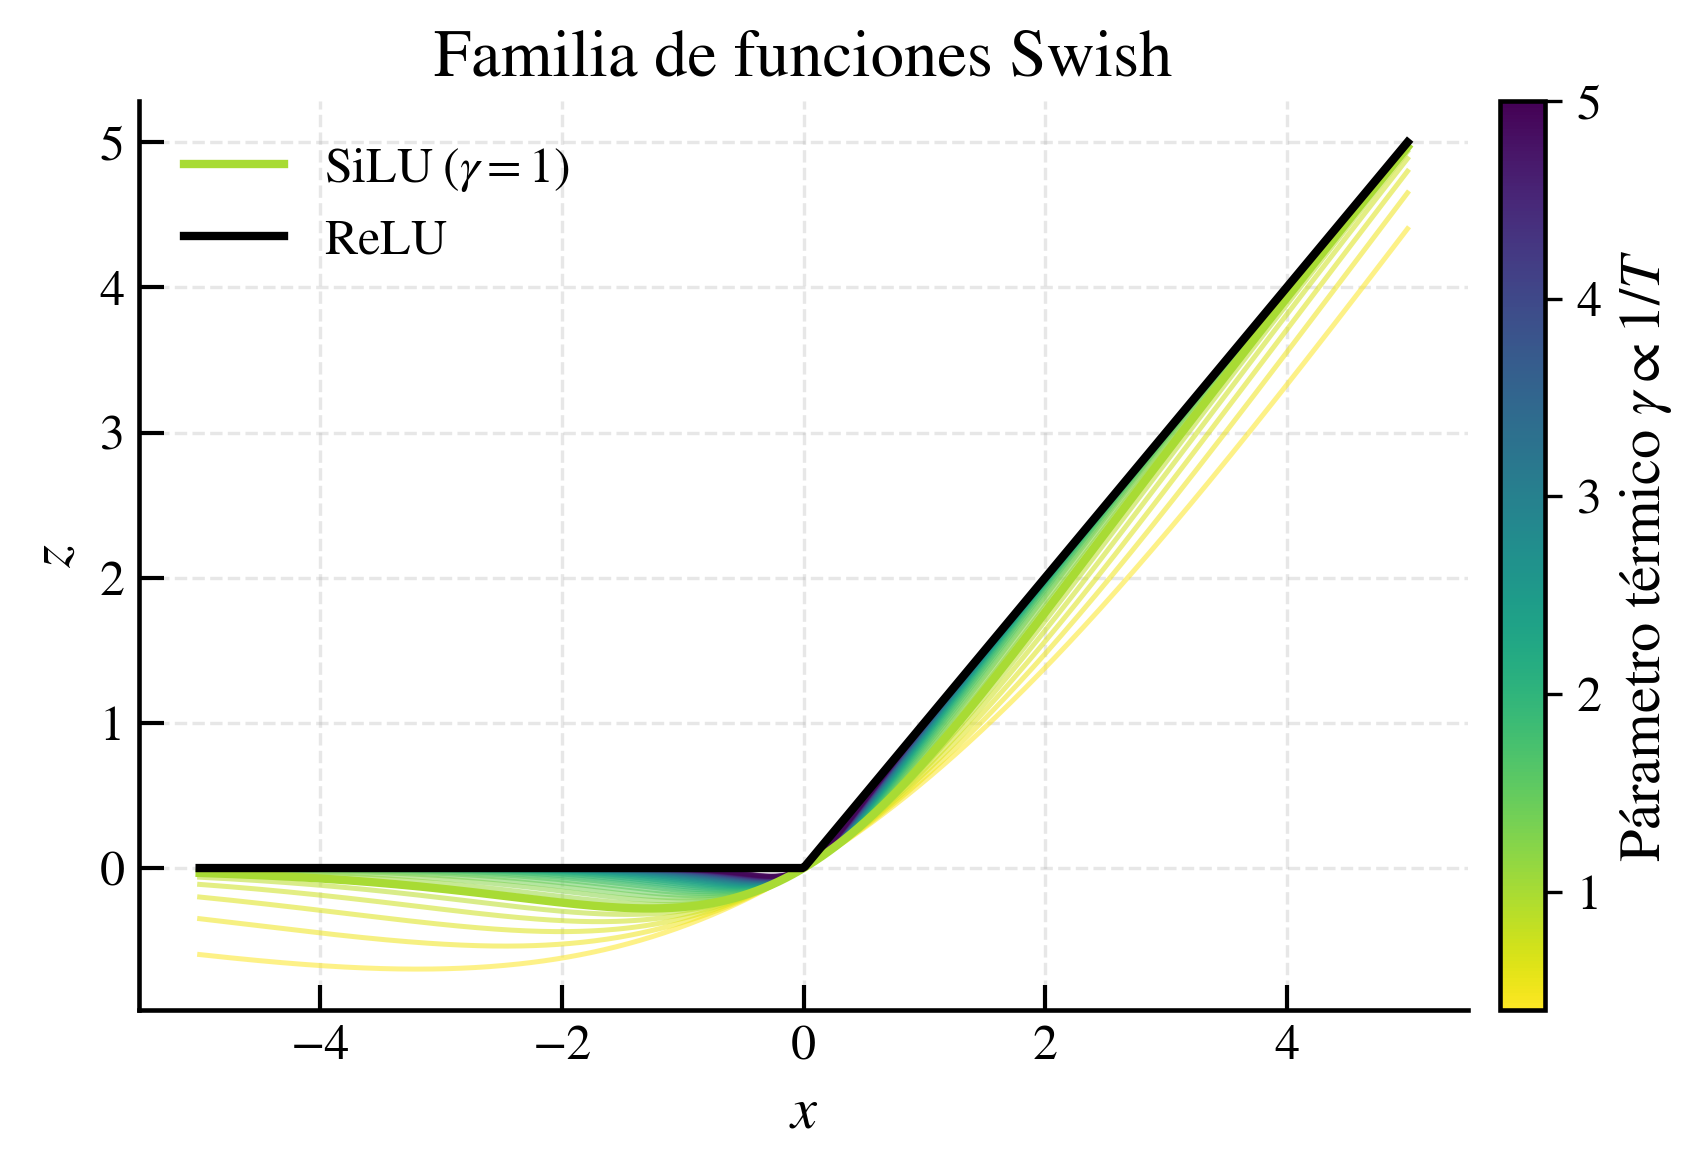

In [8]:
LANGUAGE = "es"  # "en" or "es"

TEXT = {
    "en": {
        "title": "Family of Swish Functions",
        "xlabel": r"$x$",
        "ylabel": r"$z$",
        "colorbar": r"Thermal parameter $\gamma \propto 1/T$",
        "silu": r"$\mathrm{SiLU}\;(\gamma=1)$",
        "filename": "swish_to_relu_thermal_limit_en.pdf",
    },
    "es": {
        "title": "Familia de funciones Swish",
        "xlabel": r"$x$",
        "ylabel": r"$z$",
        "colorbar": r"Párametro térmico $\gamma \propto 1/T$",
        "silu": r"$\mathrm{SiLU}\;(\gamma=1)$",
        "filename": "swish_to_relu_thermal_limit_es.pdf",
    },
}

text = TEXT[LANGUAGE]


x = linspace(-5.0, 5.0, 500)
gamma_values = linspace(0.4, 5.0, 40)

cmap = cm.viridis_r
norm = Normalize(vmin=gamma_values.min(), vmax=gamma_values.max())


figure, axes = subplots(figsize=(6.0, 4.0), dpi=300)

for gamma in gamma_values:
    swish = x / (1.0 + exp(-gamma * x))
    axes.plot(
        x,
        swish,
        color=cmap(norm(gamma)),
        linewidth=1.2,
        alpha=0.55
    )

gamma_silu = 1.0
silu = x / (1.0 + exp(-gamma_silu * x))
axes.plot(
    x,
    silu,
    color=cmap(norm(gamma_silu)),
    linewidth=2.0,
    label=text["silu"]
)

relu = maximum(0.0, x)
axes.plot(
    x,
    relu,
    color="black",
    linestyle="-",
    linewidth=2.0,
    label=r"$\mathrm{ReLU}$"
)

axes.set_xlabel(text["xlabel"])
axes.set_ylabel(text["ylabel"])
axes.set_title(text["title"])

axes.grid(True, linestyle="--", alpha=0.3)
axes.tick_params(direction="in", length=6, width=1)

axes.spines["top"].set_visible(False)
axes.spines["right"].set_visible(False) 

scalars = ScalarMappable(norm=norm, cmap=cmap)
scalars.set_array([])

colors = figure.colorbar(scalars, ax=axes, pad=0.02)
colors.set_label(text["colorbar"])
colors.ax.tick_params(length=4)

axes.legend(frameon=False)

figure.tight_layout()
figure.savefig(text["filename"], dpi=300)
show(figure)
close(figure)


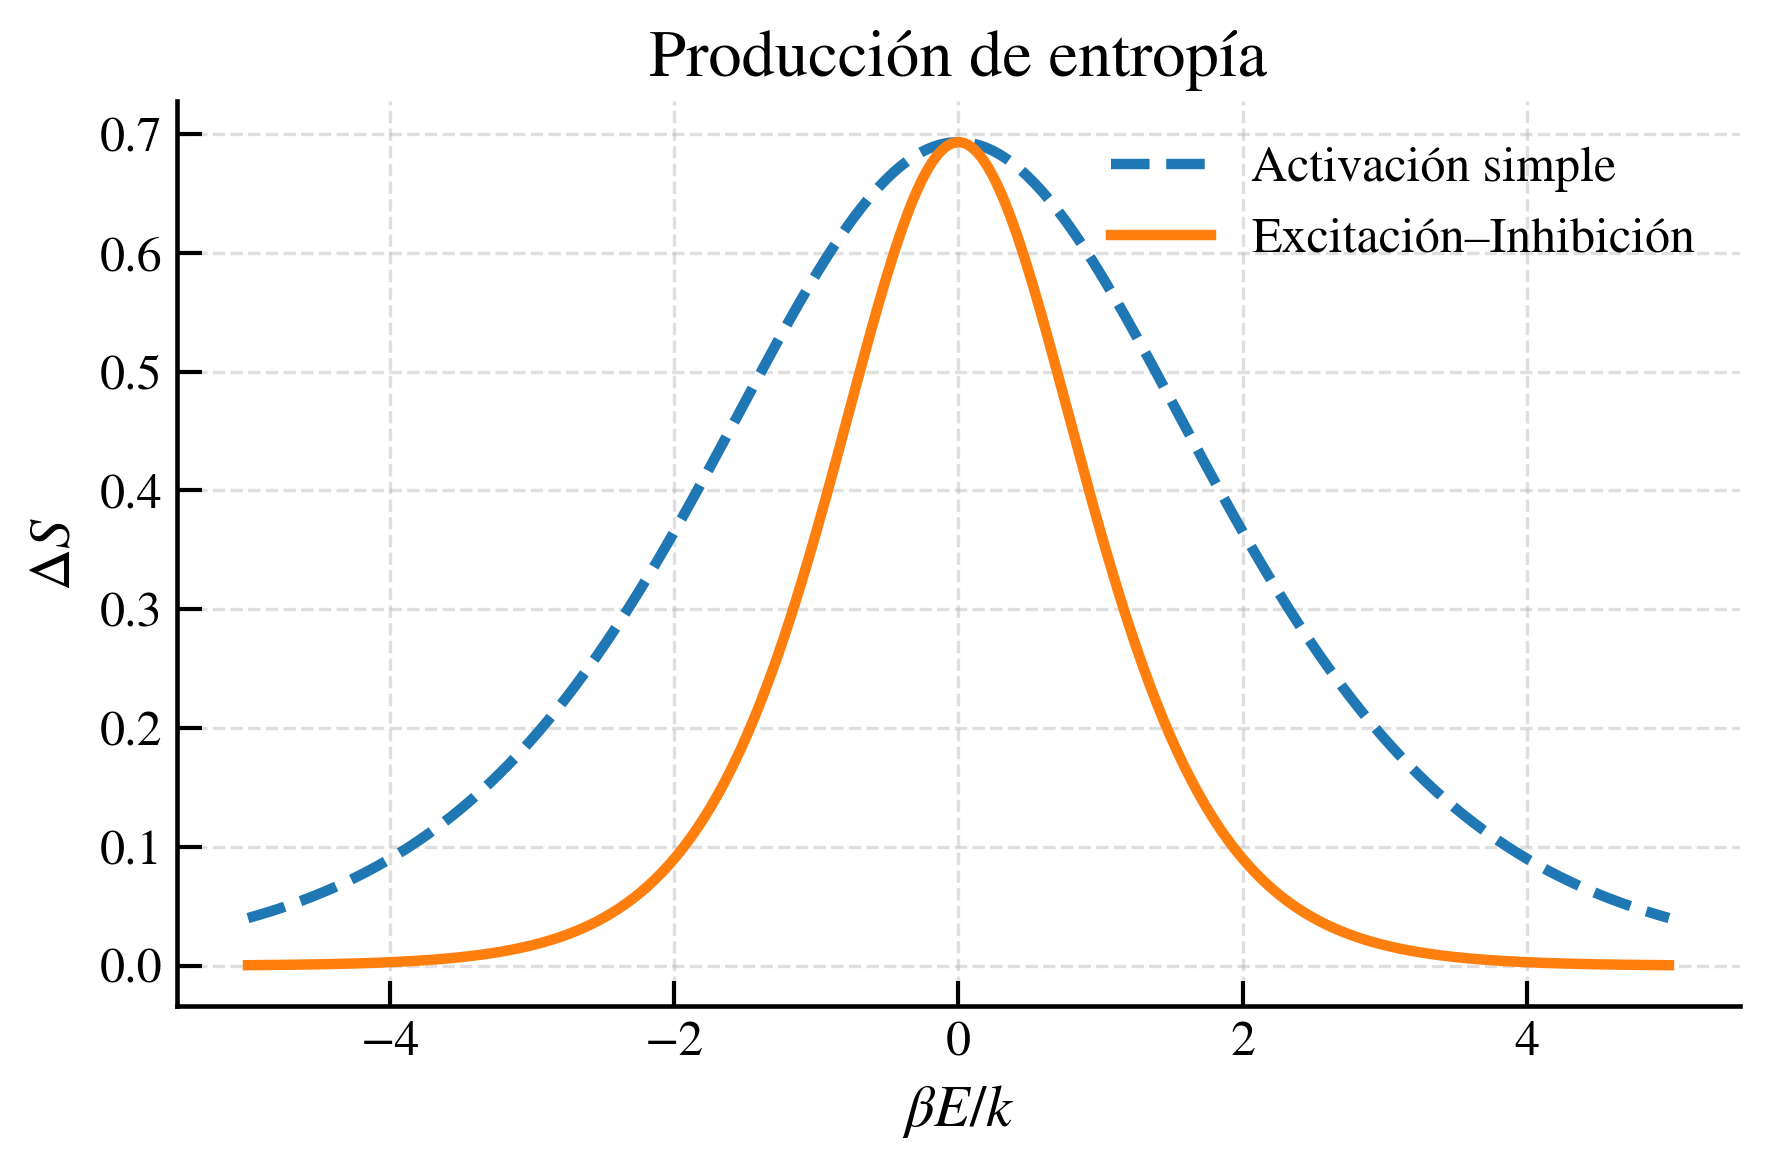

In [9]:
TEXT = {
    "en": {
        "title": "Entropy production",
        "xlabel": r"$\beta E / k$",
        "ylabel": r"$\Delta S$",
        "label_sigmoid": "Simple activation",
        "label_two": "Excitation–Inhibition",
        "filename": "entropy_comparison_en.pdf",
    },
    "es": {
        "title": "Producción de entropía",
        "xlabel": r"$\beta E / k$",
        "ylabel": r"$\Delta S$",
        "label_sigmoid": "Activación simple",
        "label_two": "Excitación–Inhibición",
        "filename": "entropy_comparison_es.pdf",
    },
}

text = TEXT[LANGUAGE]


k = 1.0
y = linspace(-5.0, 5.0, 400)

p = 1.0 / (1.0 + exp(-y))
H_sig = -k * (p * log(p) + (1.0 - p) * log(1.0 - p))

p_plus = exp(y) / (2.0 * cosh(y))
p_minus = exp(-y) / (2.0 * cosh(y))
H_two = -k * (p_plus * log(p_plus) + p_minus * log(p_minus))


figure, axes = subplots(figsize=(6.0, 4.0), dpi=300)

axes.plot(
    y,
    H_sig,
    linewidth=2.5,
    linestyle="--",
    label=text["label_sigmoid"]
)

axes.plot(
    y,
    H_two,
    linewidth=2.5,
    label=text["label_two"]
)

axes.set_xlabel(text["xlabel"])
axes.set_ylabel(text["ylabel"])
axes.set_title(text["title"])

axes.grid(True, linestyle="--", alpha=0.4)
axes.tick_params(direction="in", length=6, width=1)

axes.spines["top"].set_visible(False)
axes.spines["right"].set_visible(False)

axes.legend(frameon=False)

figure.tight_layout()
figure.savefig(text["filename"], dpi=300)
show(figure)
close(figure)


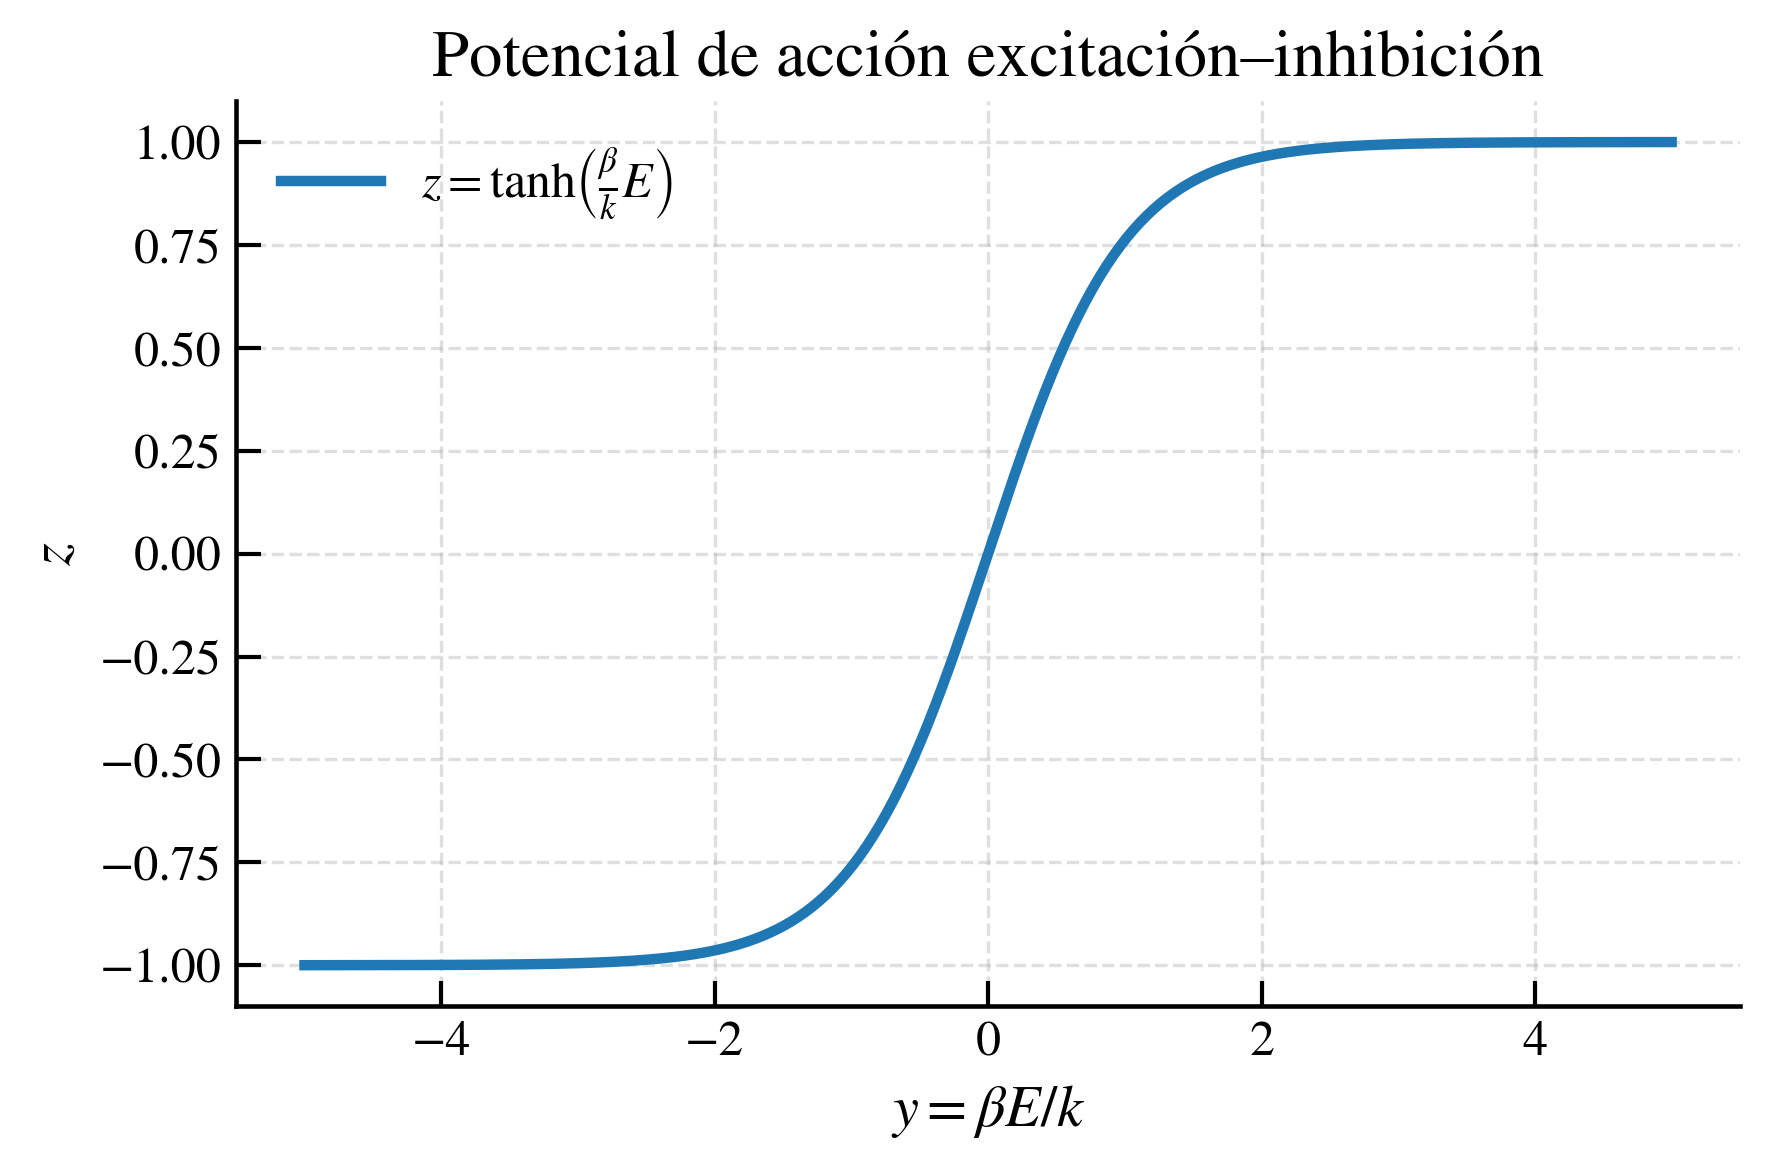

In [10]:
TEXT = {
    "en": {
        "title": "Excitation–Inhibition Action Potential",
        "xlabel": r"$y = \beta E / k$",
        "ylabel": r"$z$",
        "label": r"$z = \tanh\!\left(\frac{\beta}{k}E\right)$",
        "filename": "tanh_activation_en.pdf",
    },
    "es": {
        "title": "Potencial de acción excitación–inhibición",
        "xlabel": r"$y = \beta E / k$",
        "ylabel": r"$z$",
        "label": r"$z = \tanh\!\left(\frac{\beta}{k}E\right)$",
        "filename": "tanh_activation_es.pdf",
    },
}

text = TEXT[LANGUAGE]


y = linspace(-5.0, 5.0, 400)
v = 1.0

z = v * tanh(y)


figure, axes = subplots(figsize=(6.0, 4.0), dpi=300)

axes.plot(
    y,
    z,
    linewidth=2.5,
    label=text["label"]
)

axes.set_xlabel(text["xlabel"])
axes.set_ylabel(text["ylabel"])
axes.set_title(text["title"])

axes.grid(True, linestyle="--", alpha=0.4)
axes.tick_params(direction="in", length=6, width=1)

axes.spines["top"].set_visible(False)
axes.spines["right"].set_visible(False)

axes.legend(frameon=False)

figure.tight_layout()
figure.savefig(text["filename"], dpi=300)
show(figure)
close(figure)


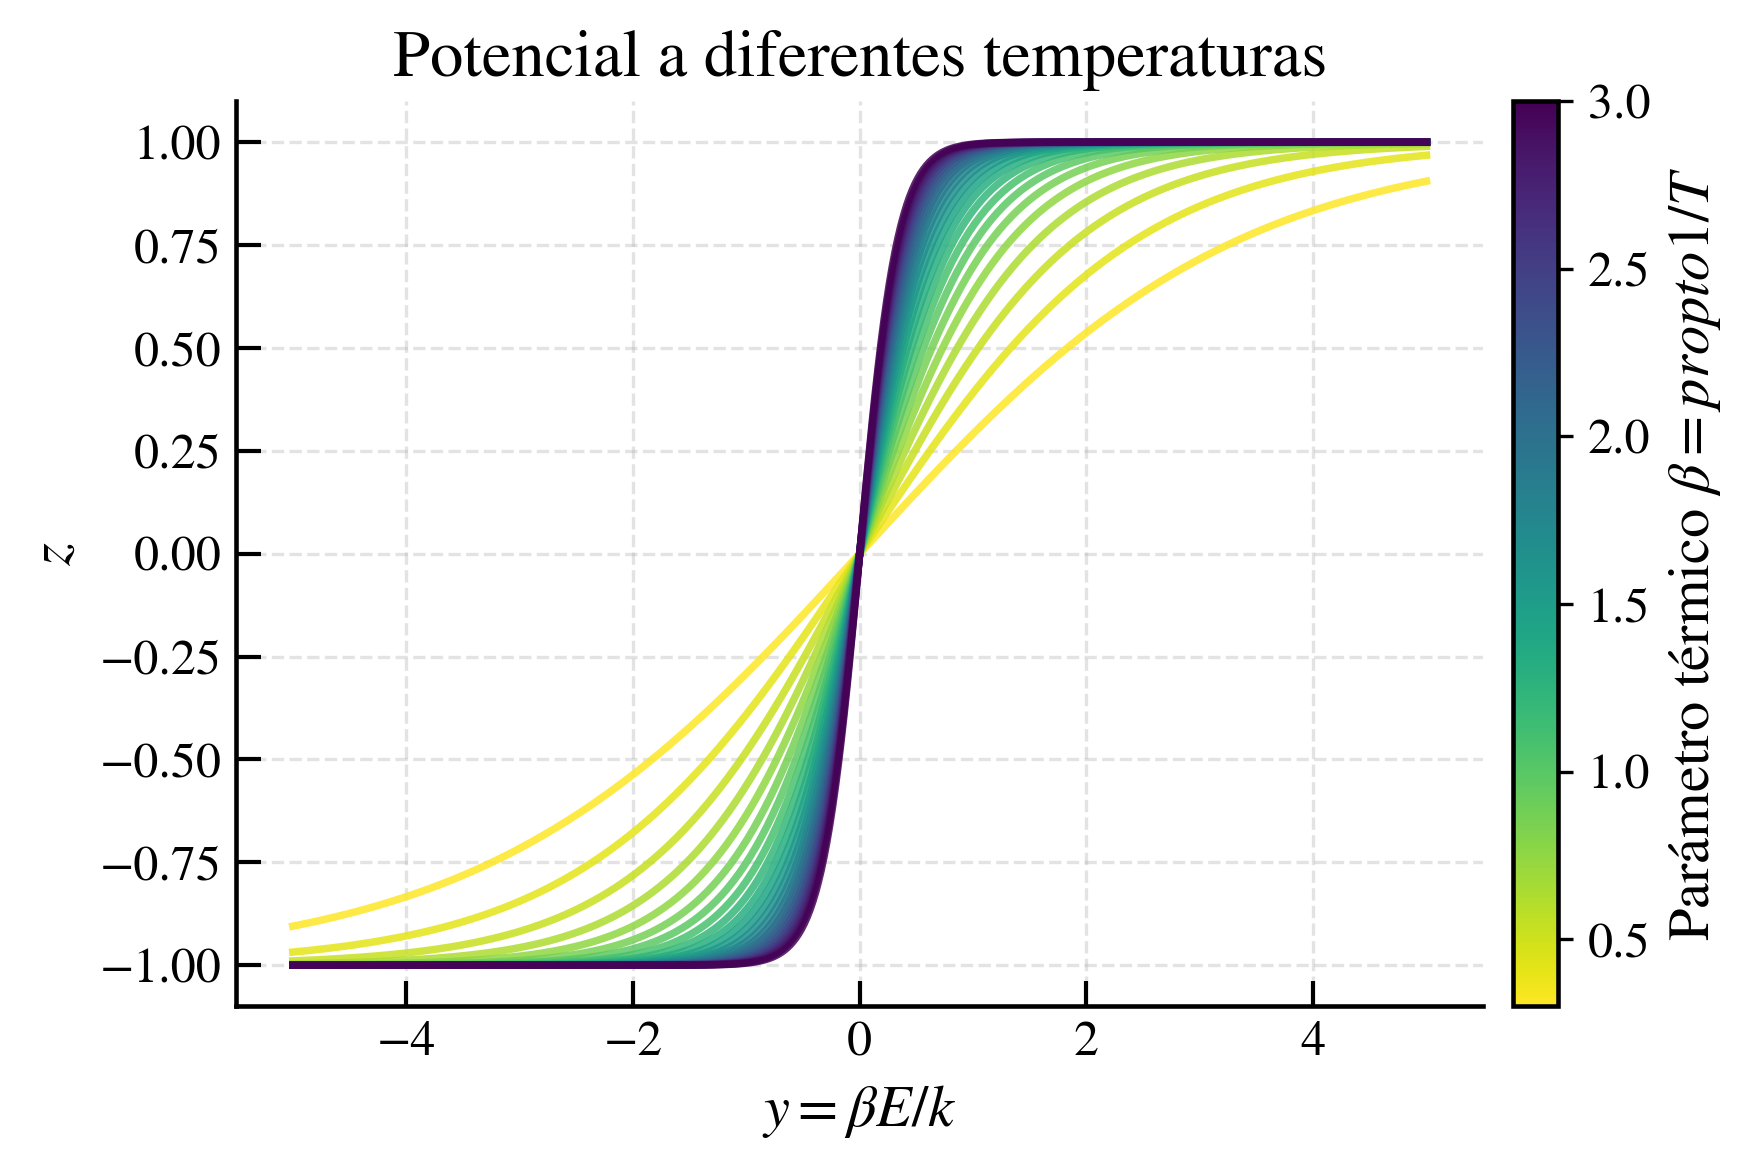

In [11]:
LANGUAGE = "es"  # "en" or "es"

TEXT = {
    "en": {
        "title": "Action potential at different temperatures",
        "xlabel": r"$y = \beta E / k$",
        "ylabel": r"$z$",
        "colorbar": r"Thermal parameter $\beta = 1/T$",
        "filename": "tanh_temperature_sweep_en.pdf",
    },
    "es": {
        "title": "Potencial a diferentes temperaturas",
        "xlabel": r"$y = \beta E / k$",
        "ylabel": r"$z$",
        "colorbar": r"Parámetro térmico $\beta = propto 1/T$",
        "filename": "tanh_temperature_sweep_es.pdf",
    },
}

text = TEXT[LANGUAGE]


y = linspace(-5.0, 5.0, 400)
v = 1.0

gamma_values = linspace(0.3, 3.0, 25)

cmap = cm.viridis_r
norm = Normalize(vmin=gamma_values.min(), vmax=gamma_values.max())


figure, axes = subplots(figsize=(6.0, 4.0), dpi=300)

for gamma in gamma_values:
    z = v * tanh(gamma * y)
    axes.plot(
        y,
        z,
        color=cmap(norm(gamma)),
        linewidth=1.8,
        alpha=0.85
    )

axes.set_xlabel(text["xlabel"])
axes.set_ylabel(text["ylabel"])
axes.set_title(text["title"])

axes.grid(True, linestyle="--", alpha=0.35)
axes.tick_params(direction="in", length=6, width=1)

axes.spines["top"].set_visible(False)
axes.spines["right"].set_visible(False)


scalars = ScalarMappable(norm=norm, cmap=cmap)
scalars.set_array([])

colors = figure.colorbar(scalars, ax=axes, pad=0.02)
colors.set_label(text["colorbar"])

figure.tight_layout()
figure.savefig(text["filename"], dpi=300)
show(figure)
close(figure)


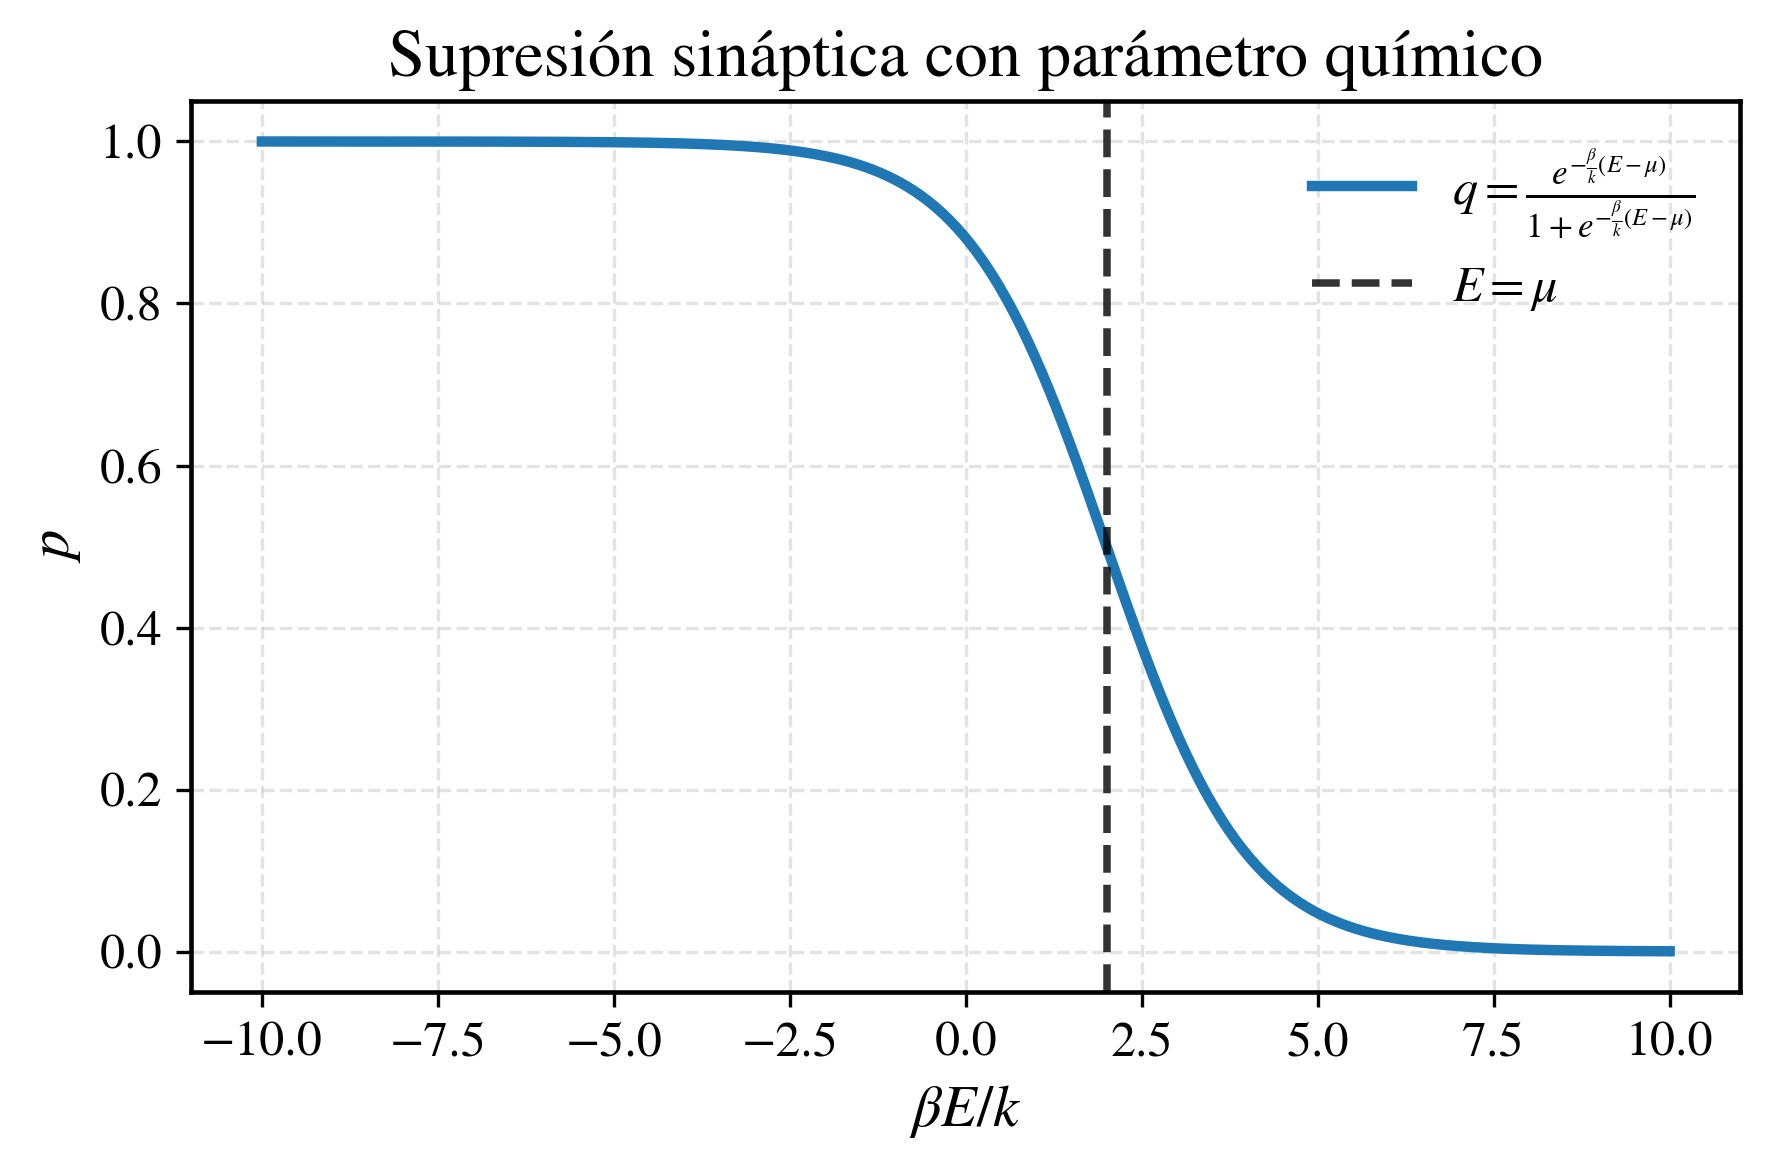

In [12]:
LANGUAGE = "es"  # "en" or "es"

TEXT = {
    "en": {
        "title": "Synaptic suppression with chemical potential",
        "xlabel": r"$\beta E / k$",
        "ylabel": r"$p$",
        "curve": r"$q=\frac{e^{-\frac{\beta}{k}(E-\mu)}}{1+e^{-\frac{\beta}{k}(E-\mu)}}$",
        "threshold": r"$E=\mu$",
        "filename": "synaptic_suppression_threshold_en.pdf",
    },
    "es": {
        "title": "Supresión sináptica con parámetro químico",
        "xlabel": r"$\beta E / k$",
        "ylabel": r"$p$",
        "curve": r"$q=\frac{e^{-\frac{\beta}{k}(E-\mu)}}{1+e^{-\frac{\beta}{k}(E-\mu)}}$",
        "threshold": r"$E=\mu$",
        "filename": "synaptic_suppression_threshold_es.pdf",
    },
}

text = TEXT[LANGUAGE]


beta = 1.0
k = 1.0
mu = 2.0

E = linspace(-10.0, 10.0, 400)

p = 1.0 - 1.0 / (1.0 + exp(-(beta / k) * (E - mu)))


figure, axes = subplots(figsize=(6.0, 4.0), dpi=300)

axes.plot(
    E,
    p,
    linewidth=2.5,
    label=text["curve"]
)

axes.axvline(
    x=mu,
    linestyle="--",
    linewidth=1.8,
    color="black",
    alpha=0.8,
    label=text["threshold"]
)

axes.set_xlabel(text["xlabel"])
axes.set_ylabel(text["ylabel"])
axes.set_title(text["title"])

axes.grid(True, linestyle="--", alpha=0.35)

axes.legend(frameon=False)

figure.tight_layout()
figure.savefig(text["filename"], dpi=300)
show(figure)
close(figure)

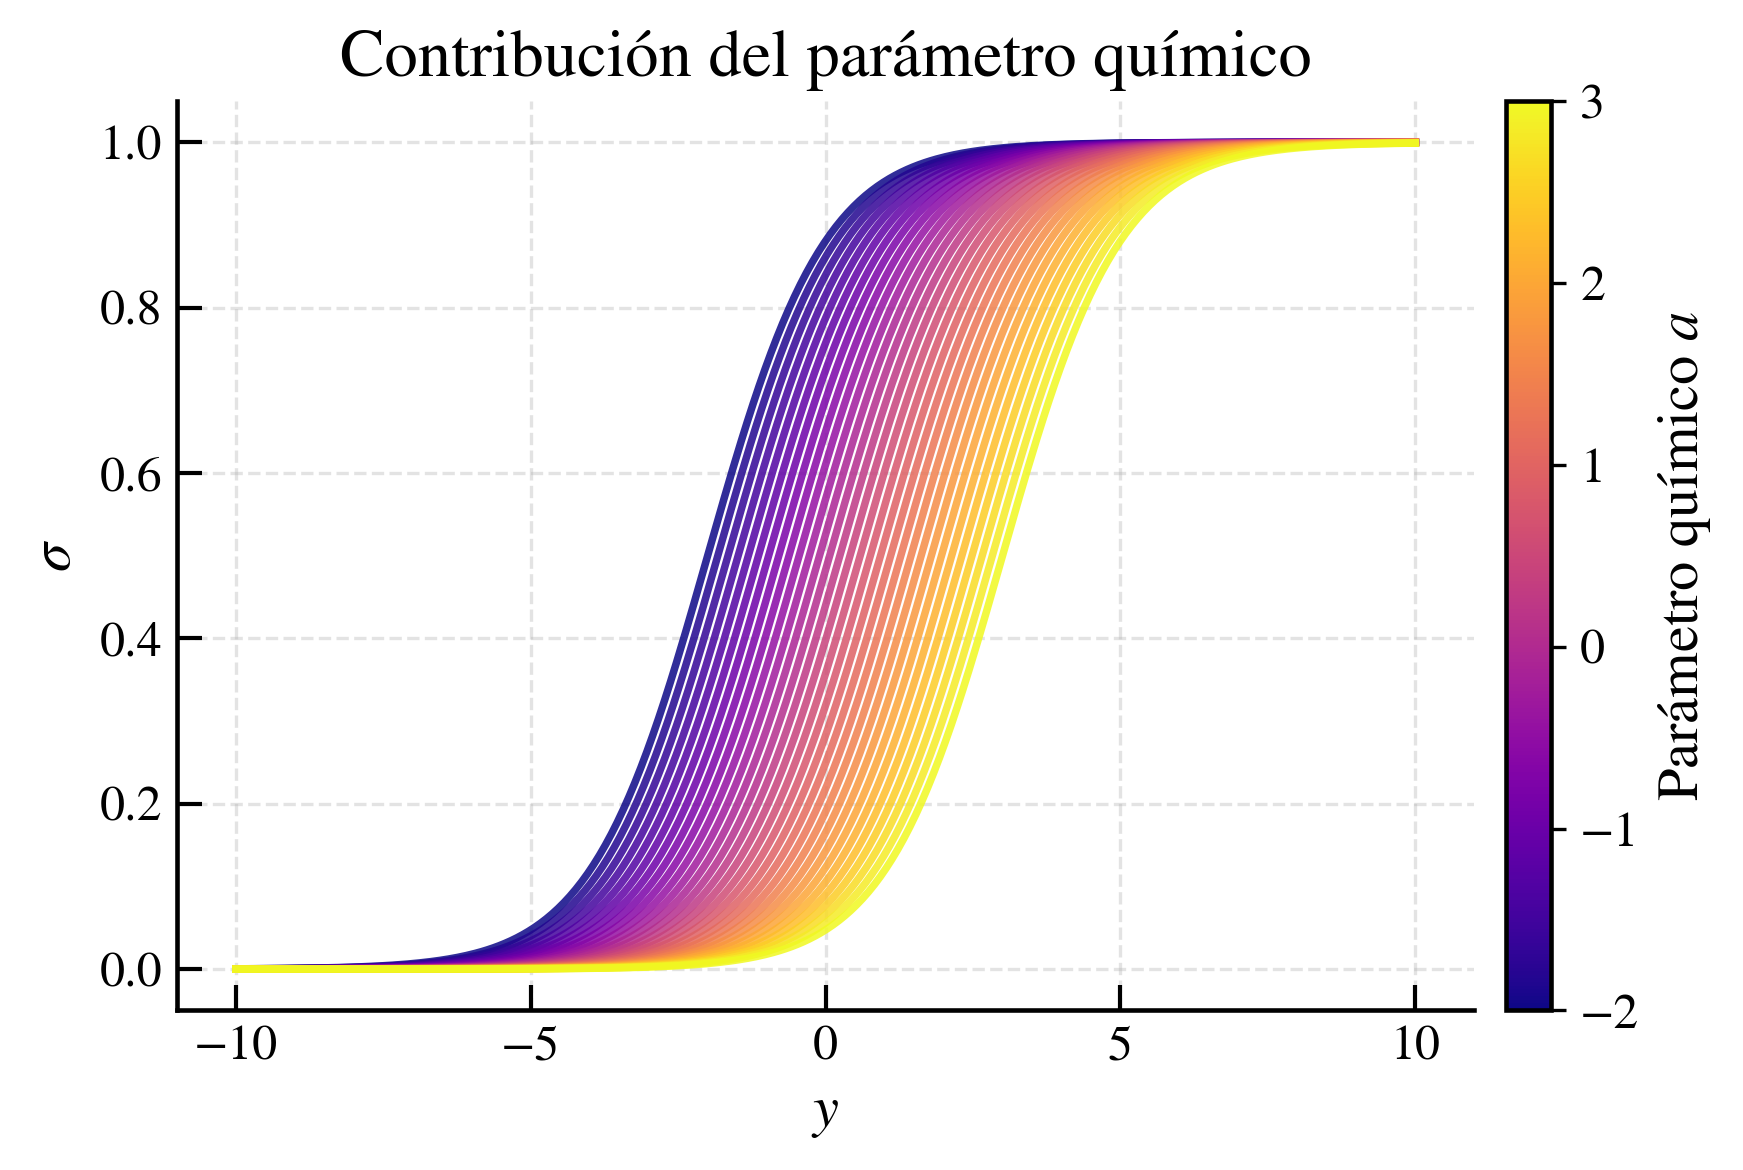

In [13]:
TEXT = {
    "en": {
        "title": "Contribution of the chemical parameter",
        "xlabel": r"$y$",
        "ylabel": r"$\sigma$",
        "colorbar": r"Chemical parameter $a$",
        "filename": "synaptic_suppression_property_en.pdf",
    },
    "es": {
        "title": "Contribución del parámetro químico",
        "xlabel": r"$y$",
        "ylabel": r"$\sigma$",
        "colorbar": r"Parámetro químico $a$",
        "filename": "synaptic_suppression_property_es.pdf",
    },
}

text = TEXT[LANGUAGE]


y = linspace(-10.0, 10.0, 400)

a_values = linspace(-2.0, 3.0, 30)

cmap = cm.plasma
norm = Normalize(vmin=a_values.min(), vmax=a_values.max())


figure, axes = subplots(figsize=(6.0, 4.0), dpi=300)

for a in a_values:
    q = 1.0 - 1.0 / (1.0 + exp(y - a))
    axes.plot(
        y,
        q,
        color=cmap(norm(a)),
        linewidth=1.8,
        alpha=0.85
    )

axes.set_xlabel(text["xlabel"])
axes.set_ylabel(text["ylabel"])
axes.set_title(text["title"])

axes.grid(True, linestyle="--", alpha=0.35)
axes.tick_params(direction="in", length=6, width=1)

axes.spines["top"].set_visible(False)
axes.spines["right"].set_visible(False)


scalars = ScalarMappable(norm=norm, cmap=cmap)
scalars.set_array([])

colors = figure.colorbar(scalars, ax=axes, pad=0.02)
colors.set_label(text["colorbar"])

figure.tight_layout()
figure.savefig(text["filename"], dpi=300)
show(figure)
close(figure)


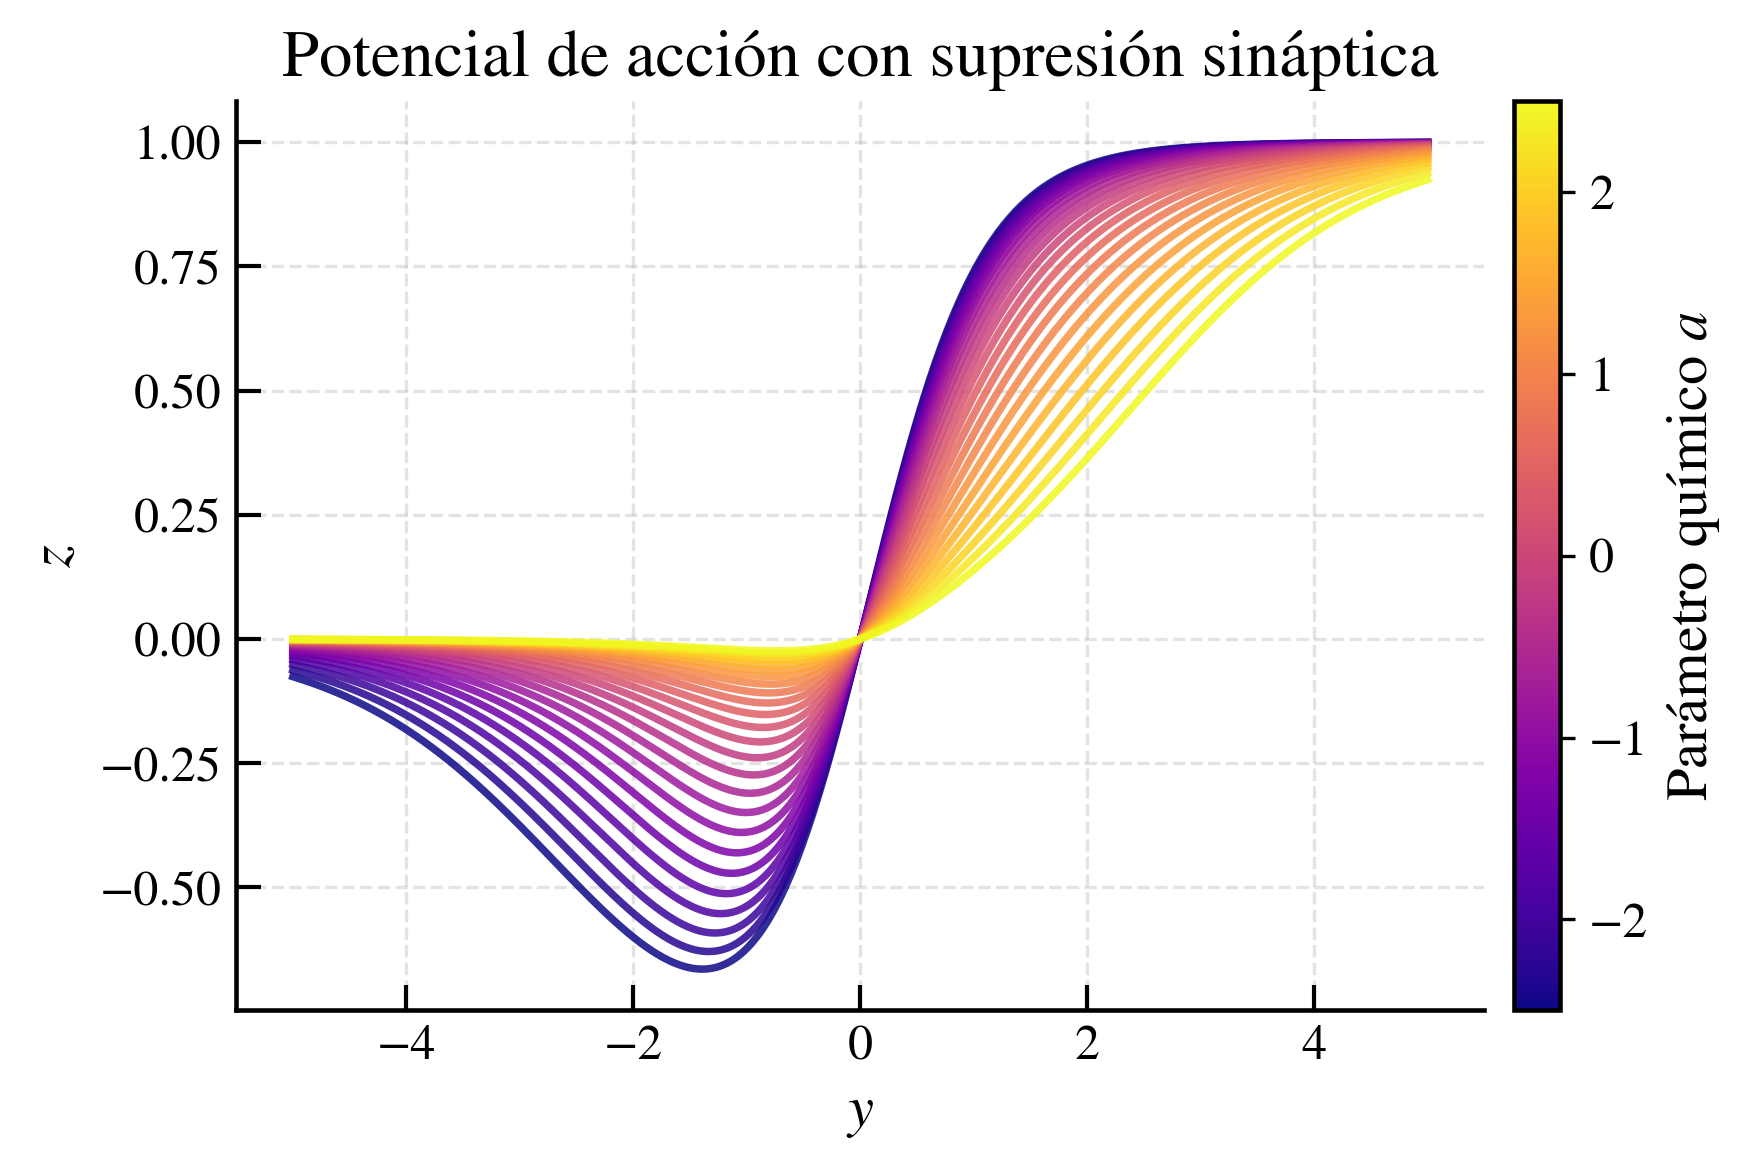

In [14]:
TEXT = {
    "en": {
        "title": "Action potential with synaptic suppression",
        "xlabel": r"$y$",
        "ylabel": r"$z$",
        "colorbar": r"Chemical parameter $a$",
        "filename": "suppressed_tanh_activation_sweep_en.pdf",
    },
    "es": {
        "title": "Potencial de acción con supresión sináptica",
        "xlabel": r"$y$",
        "ylabel": r"$z$",
        "colorbar": r"Parámetro químico $a$",
        "filename": "suppressed_tanh_activation_sweep_es.pdf",
    },
}

text = TEXT[LANGUAGE]


y = linspace(-5.0, 5.0, 400)
a_values = linspace(-2.5, 2.5, 25)
v = 1.0

cmap = cm.plasma
norm = Normalize(vmin=a_values.min(), vmax=a_values.max())


figure, axes = subplots(figsize=(6.0, 4.0), dpi=300)

for a in a_values:
    z = v * tanh(y) / (1.0 + exp(-(y - a)))
    axes.plot(
        y,
        z,
        color=cmap(norm(a)),
        linewidth=1.8,
        alpha=0.85
    )

axes.set_xlabel(text["xlabel"])
axes.set_ylabel(text["ylabel"])
axes.set_title(text["title"])

axes.grid(True, linestyle="--", alpha=0.35)
axes.tick_params(direction="in", length=6, width=1)

axes.spines["top"].set_visible(False)
axes.spines["right"].set_visible(False)


scalars = ScalarMappable(norm=norm, cmap=cmap)
scalars.set_array([])

colors = figure.colorbar(scalars, ax=axes, pad=0.02)
colors.set_label(text["colorbar"])

figure.tight_layout()
figure.savefig(text["filename"], dpi=300)
show(figure)
close(figure)